In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.5, 1/10000]
I = [0.1, 1/10000]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

In [3]:
check_parameters(agents, M, E, I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
| 1000 		 0.5 		 0.1 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.1
The mean of I is: 0.5
-------------------------------------
The population mean parameters entered were: 1000, 0.5, 0.1
The population s.d. parameters entered were: 0.0001, 0.0001, 0.0001
condition mean M satisfied
condition mean E satisfied
condition 

In [4]:
tournament_seed1024_mm1000_me05_mi01_sdm0_sde0_sdi0 = Tournament.create_play_tournament(
                 countries = agents,
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 109 minutes.


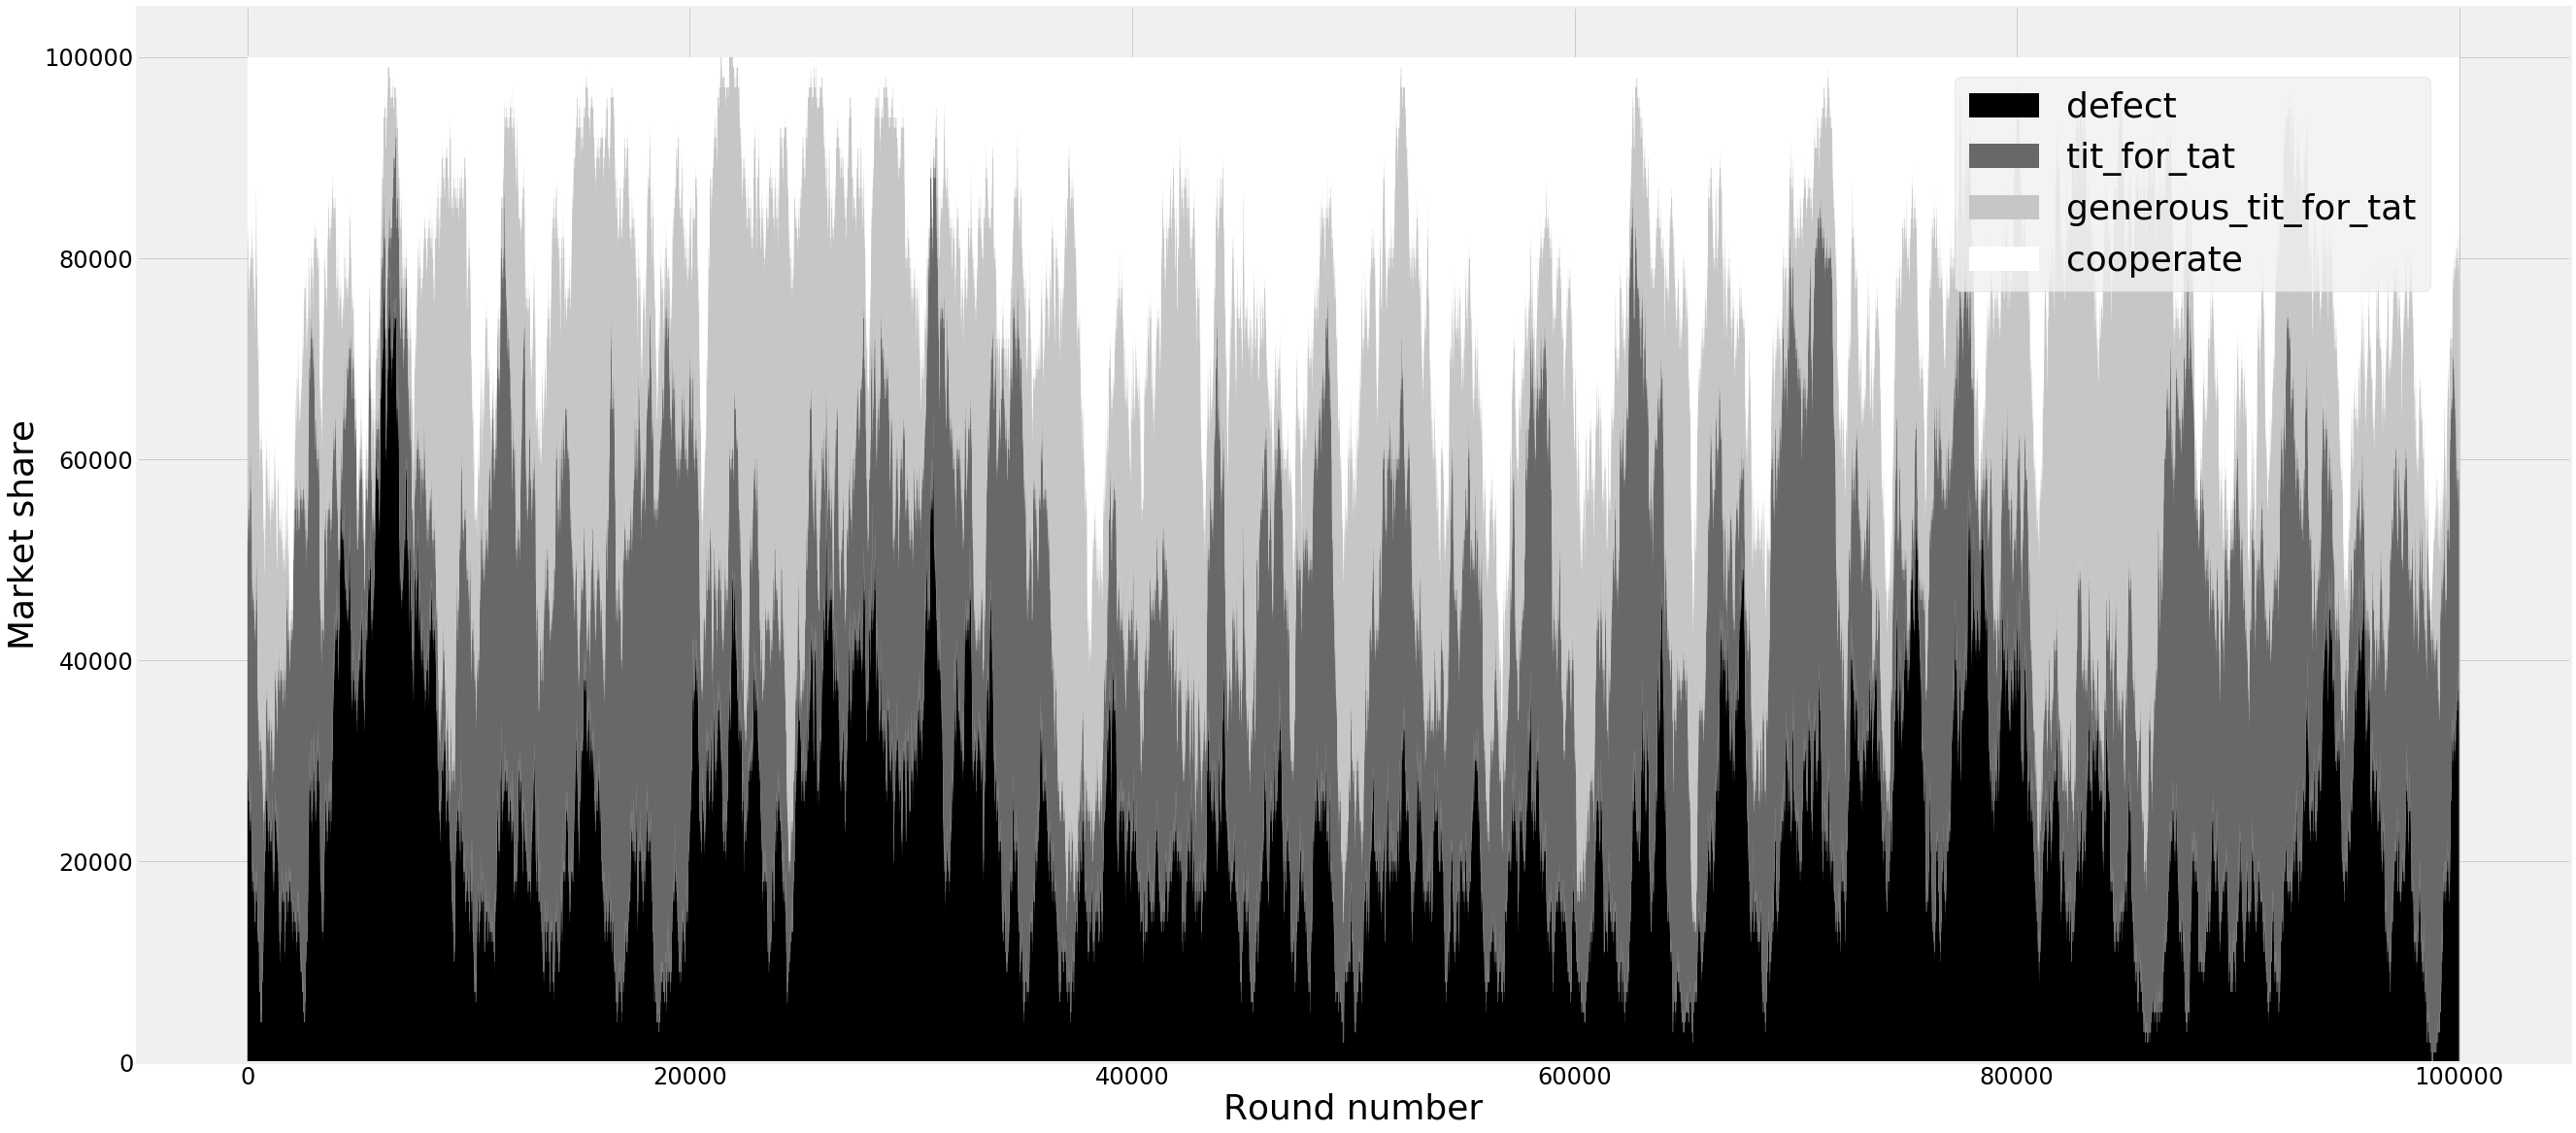

In [5]:
draw_stack(tournament_seed1024_mm1000_me05_mi01_sdm0_sde0_sdi0)

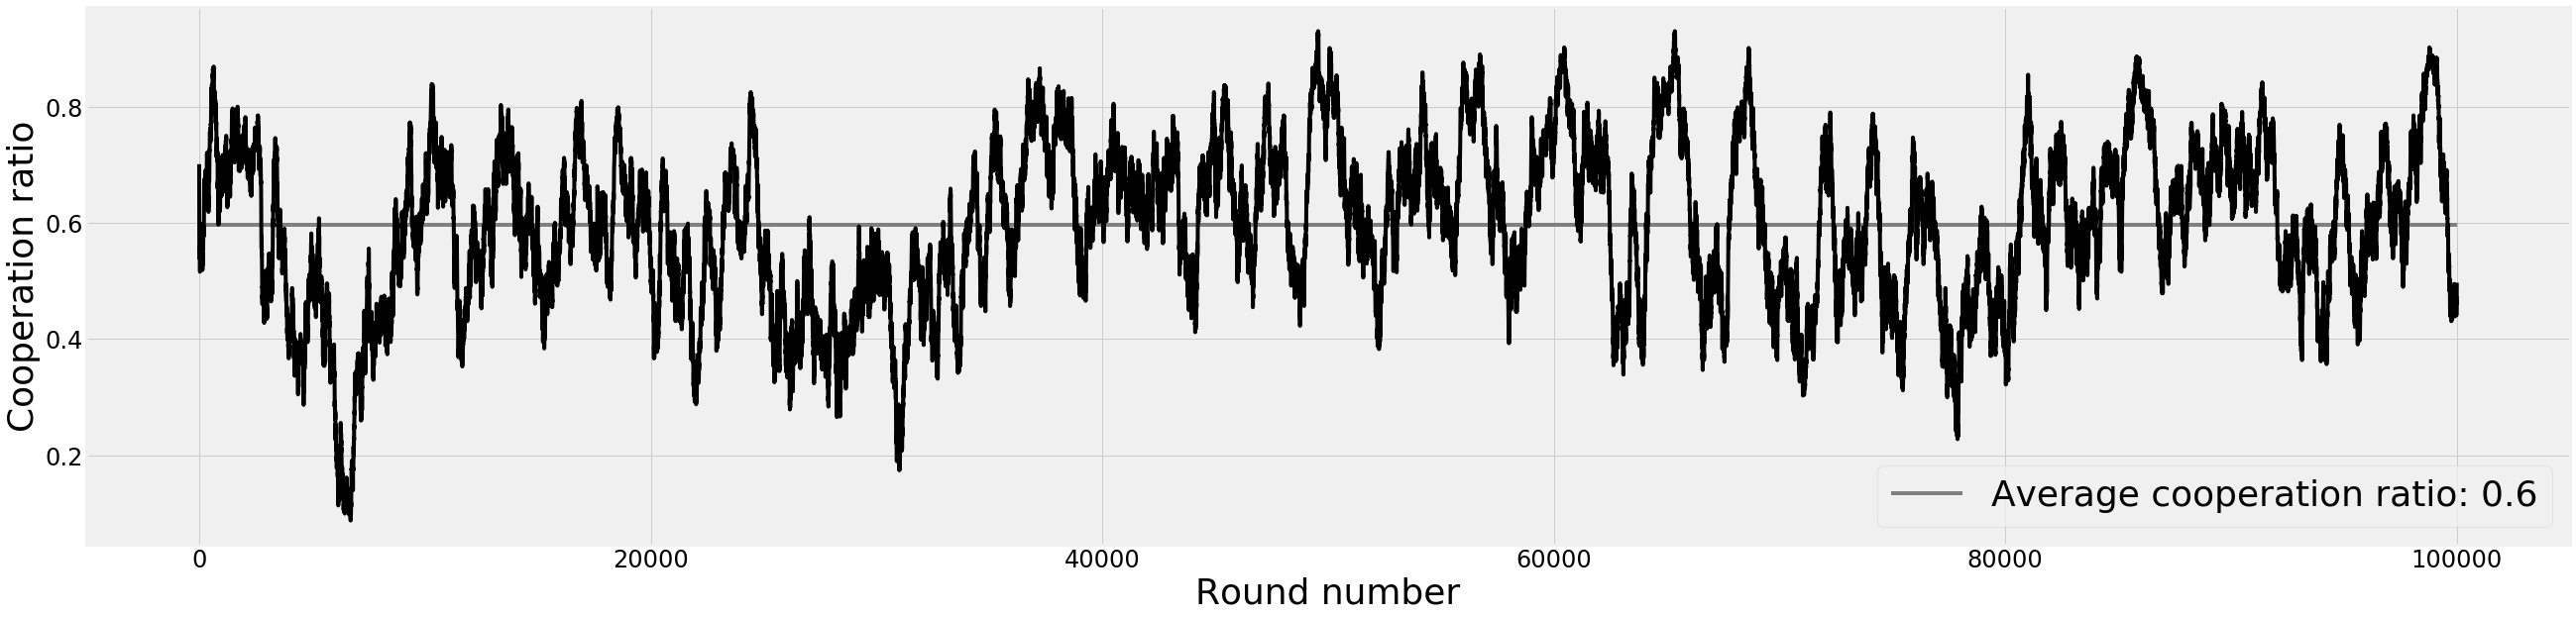

In [6]:
C_D_ratios_per_round(tournament_seed1024_mm1000_me05_mi01_sdm0_sde0_sdi0)

In [7]:
outliers = count_outliers(tournament_seed1024_mm1000_me05_mi01_sdm0_sde0_sdi0, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_tournament_seed1024_mm1000_me05_mi01_sdm0_sde0_sdi0.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5    1022
1    0.6    1062
2    0.7     946
3    0.8     904
4    0.9     805
5    1.0     767
6    1.1     676
7    1.2     615
8    1.3     577
9    1.4     492
10   1.5     460
11   1.6     398
12   1.7     302
13   1.8     191
14   1.9     134
15   2.0     119
16   2.1      44
17   2.2      26
18   2.3      20
19   2.4       9
20   2.5      15
21   2.6      19
22   2.7      16
23   2.8      13
24   2.9       7
25   3.0      12


In [8]:
save_cooperate_csv(tournament_seed1024_mm1000_me05_mi01_sdm0_sde0_sdi0, type_of_tournament= "tournament_seed1024_mm1000_me05_mi01_sdm0_sde0_sdi0", seed = str(seed))